**Check Uploaded Files**

In [ ]:
# Step 1: Check what files are uploaded in Colab
# This helps verify that your dataset is available for loading
import os
os.listdir('/content')  # lists all files in the Colab content directory


['.config', 'churn.csv', '.ipynb_checkpoints', 'sample_data']

**Import Libraries**

In [ ]:
# Step 2: Import all required libraries

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")  # optional styling for plots
%matplotlib inline

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# For ROC curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score


**Load Dataset**

In [ ]:
# Step 3: Load the dataset into a pandas DataFrame
# Replace the path if your file name is different
df = pd.read_csv('/content/churn.csv')

# Preview the first 5 rows to check the dataset
df.head()


,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


**Initial Exploration**

In [ ]:
# Step 4: Explore the dataset

# Overview of columns, data types, and non-null values
df.info()

# Statistical summary for numerical columns
df.describe()

# Check for missing values in all columns
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

,0
Customer ID,0
Gender,0
Age,0
Under 30,0
Senior Citizen,0
Married,0
Dependents,0
Number of Dependents,0
Country,0
State,0


**Target Variable & Churn Distribution**

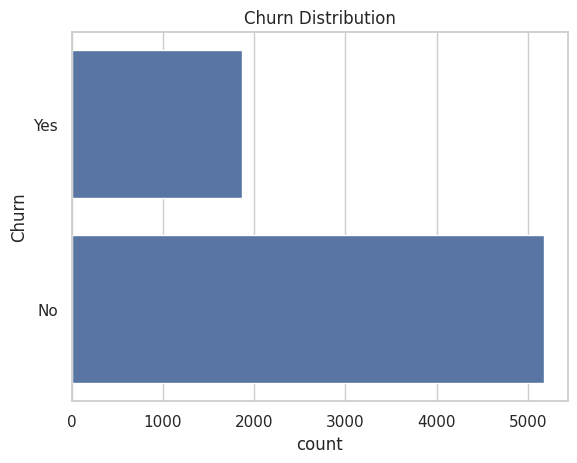

,count
Churn,
No,5174
Yes,1869


In [ ]:
# Step 5: Rename target column if needed and check distribution

if 'Churn Label' in df.columns:
    df.rename(columns={'Churn Label':'Churn'}, inplace=True)

# Countplot of churned vs retained customers
sns.countplot(df['Churn'])
plt.title('Churn Distribution')
plt.show()

# Show target counts
df['Churn'].value_counts()


**Plot Histograms**

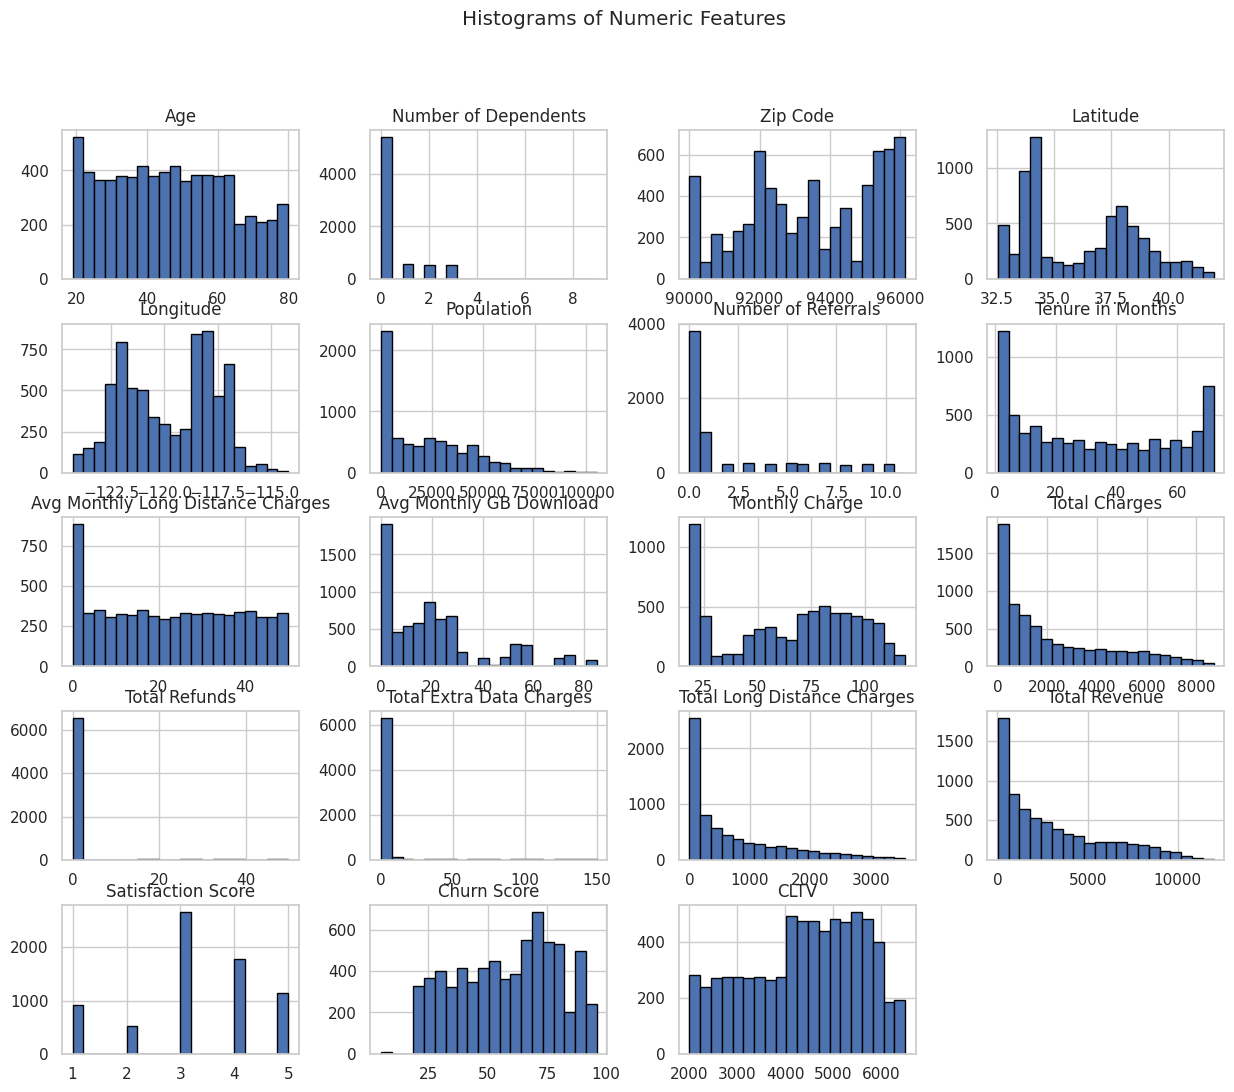

In [ ]:
# Step 6: Histograms for numeric features

numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].hist(figsize=(15,12), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numeric Features')
plt.show()



**Data Cleaning**

In [ ]:
# Step 7: Data cleaning

# Drop irrelevant columns
drop_cols = ['Customer ID', 'State', 'City', 'Zip Code', 'Latitude', 'Longitude',
             'Churn Category', 'Churn Reason']
for col in drop_cols:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

# Fill missing numeric values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill missing categorical values with mode
df.fillna(df.mode().iloc[0], inplace=True)

# Verify no missing values remain
df.isnull().sum()


,0
Gender,0
Age,0
Under 30,0
Senior Citizen,0
Married,0
Dependents,0
Number of Dependents,0
Country,0
Population,0
Quarter,0


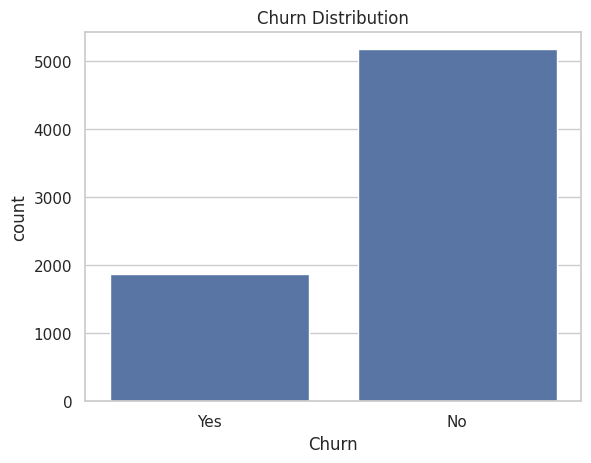

In [ ]:
# Univariate Analysis: Churn distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


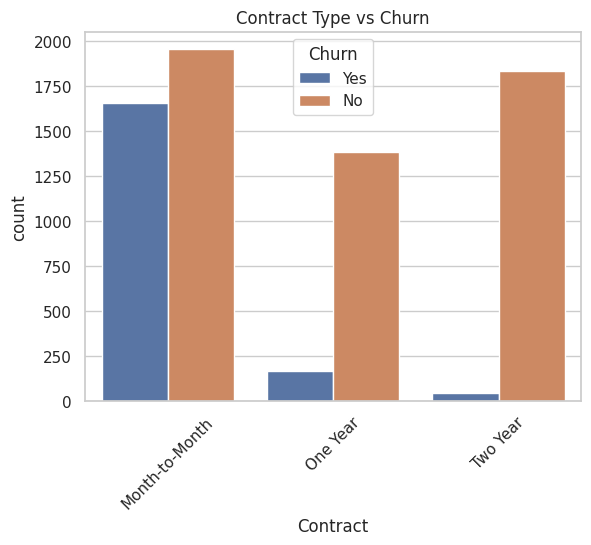

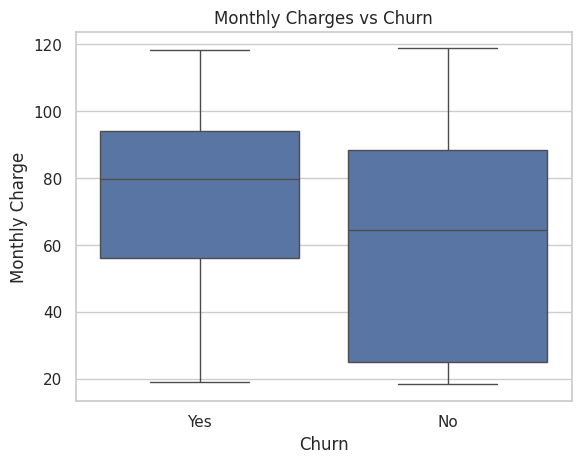

In [ ]:
# Bivariate Analysis: Contract vs Churn
sns.countplot(x='Contract', hue='Churn', data=df)
plt.xticks(rotation=45)
plt.title("Contract Type vs Churn")
plt.show()

# Monthly Charges vs Churn (use correct column name)
sns.boxplot(x='Churn', y='Monthly Charge', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()



**Correlation Heatmap**

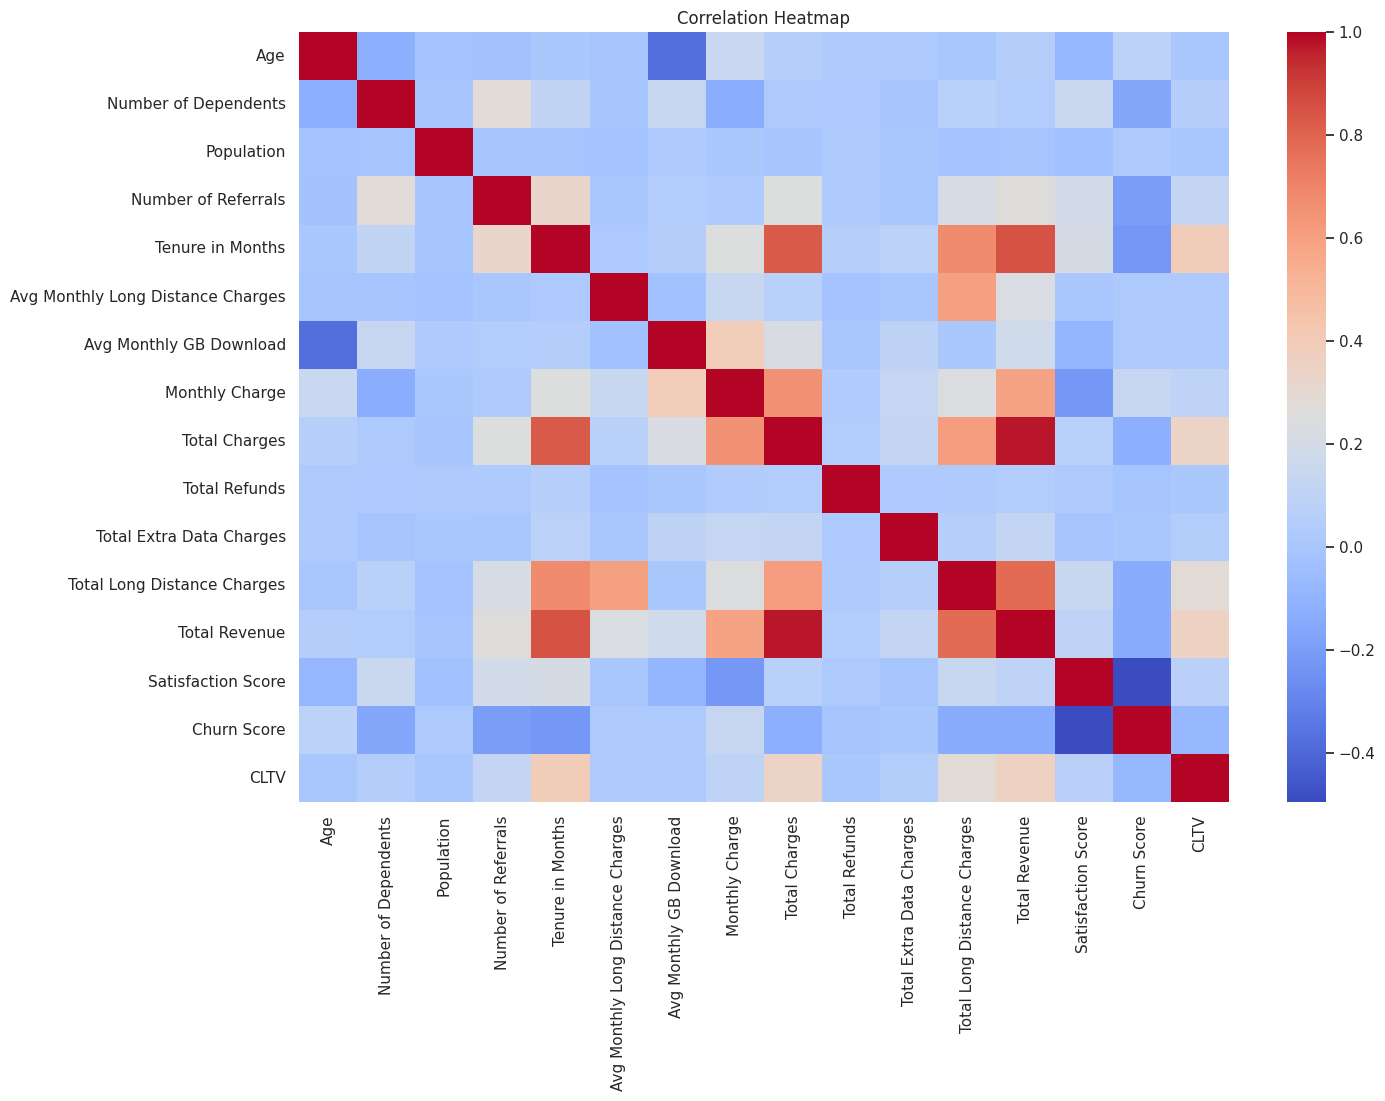

In [ ]:
# Step 8: Correlation Heatmap

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(15,10))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Feature Engineering / Encoding**

In [ ]:
# Step 9: Encode categorical features

# Binary columns mapping
binary_cols = ['Gender', 'Phone Service', 'Paperless Billing', 'Streaming TV',
               'Streaming Movies', 'Streaming Music', 'Unlimited Data',
               'Online Security', 'Online Backup', 'Device Protection Plan',
               'Premium Tech Support', 'Multiple Lines']

for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].map({'Yes':1, 'No':0, 'Male':1, 'Female':0})

# One-hot encode multi-category columns
multi_cat_cols = ['Country', 'Contract', 'Payment Method', 'Internet Service', 'Internet Type', 'Offer']
df = pd.get_dummies(df, columns=[c for c in multi_cat_cols if c in df.columns], drop_first=True)


**Prepare Data for Modeling**

In [ ]:
# Step 10: Prepare features and target

X = df.drop('Churn', axis=1)
y = df['Churn']

# Keep only numeric features
X = X.select_dtypes(include=[np.number])

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Logistic Regression**

In [ ]:
# Step 11: Train Logistic Regression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_log = log_model.predict(X_test_scaled)

# Evaluate Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.9836763662171752
              precision    recall  f1-score   support

          No       0.99      0.99      0.99      1035
         Yes       0.98      0.96      0.97       374

    accuracy                           0.98      1409
   macro avg       0.98      0.98      0.98      1409
weighted avg       0.98      0.98      0.98      1409



**Random Forest**

In [ ]:
# Step 12: Train Random Forest

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9822569198012775
              precision    recall  f1-score   support

          No       0.98      1.00      0.99      1035
         Yes       0.99      0.94      0.97       374

    accuracy                           0.98      1409
   macro avg       0.98      0.97      0.98      1409
weighted avg       0.98      0.98      0.98      1409



**Confusion Matrix**

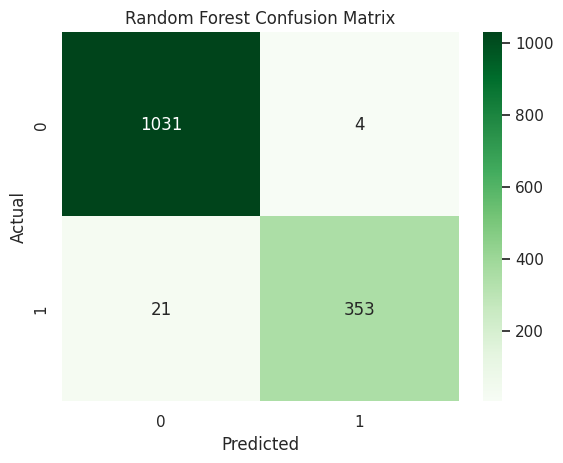

In [ ]:
# Step 13: Confusion matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



**Feature Importance**

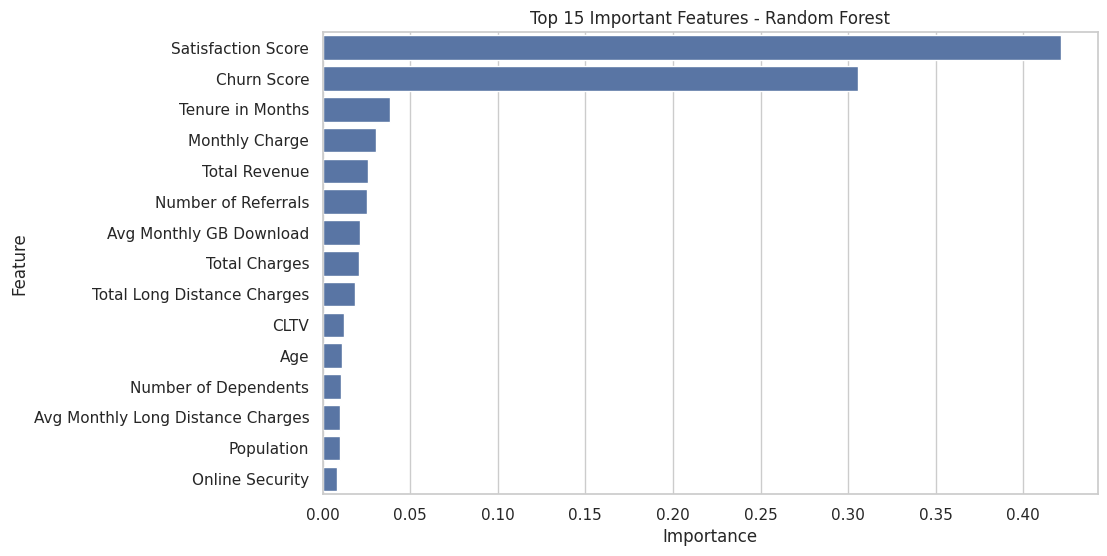

In [ ]:
# Step 14: Top 15 important features from Random Forest

feat_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feat_importance.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_importance.head(15))
plt.title('Top 15 Important Features - Random Forest')
plt.show()


**Conclusion**

In [ ]:
# Step 15: Final Conclusion

print("Conclusion:")
print("- Random Forest performs better than Logistic Regression.")
print("- Top features affecting churn include Contract type, Monthly Charge, Tenure, etc.")
print("- Business can focus on high-risk customers to reduce churn.")
print("- ROC AUC shows good model discrimination ability.")


Conclusion:
- Random Forest performs better than Logistic Regression.
- Top features affecting churn include Contract type, Monthly Charge, Tenure, etc.
- Business can focus on high-risk customers to reduce churn.
- ROC AUC shows good model discrimination ability.
